# Introduction

These codes simulate the **time evolution of a quantum wave packet** encountering a **step potential barrier** using the **Crank-Nicolson finite difference method**. It is based on the **time-dependent Schrödinger equation** (TDSE), which governs the quantum state evolution of a particle.

---

## Schrödinger Equation and Wave Function

In quantum mechanics, the time evolution of a wave function $ \psi(x,t) $ is given by the **time-dependent Schrödinger equation**:
$$
i \hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi
$$
where $ \hat{H} $ is the **Hamiltonian operator**, which represents the total energy of the system:
$$
\hat{H} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)
$$
Here:
- $ \hbar $ is the **reduced Planck's constant** (set to 1 in this simulation),
- $ m $ is the **particle's mass** (also set to 1),
- $ V(x) $ is the **potential energy function**.

The wave function $ \psi(x, t) $ is a **complex-valued function** that represents the quantum state. The **probability density** of finding the particle at position $ x $ is given by:
$$
|\psi(x,t)|^2
$$

---

## Defining the Step Potential

The step potential is defined as:
$$
V(x) = \begin{cases}
0, & x < 0 \\
V_0, & x \geq 0
\end{cases}
$$
where $ V_0 = 2 $ (in arbitrary units) is the height of the potential barrier.

---

## Initial Wave Packet
The initial wave function is modeled as a **Gaussian wave packet**:
$$
\psi(x, 0) = e^{i k_0 x} e^{-\frac{(x - x_0)^2}{2\sigma^2}}
$$
where:
- $ x_0 $ is the **initial position** of the wave packet,
- $ k_0 $ is the **initial wave number** (related to the momentum $ p_0 = \hbar k_0 $),
- $ \sigma $ is the **wave packet width**.

Normalization is applied so that the total probability integrates to 1.

---

## Crank-Nicolson Method for Time Evolution
The time evolution of the wave function is computed using the **Crank-Nicolson method**, which is a stable numerical approach for solving the Schrödinger equation. 

### **Discretization of the Schrödinger Equation**
Using the **finite difference approximation**, we discretize the spatial and temporal derivatives on a **grid** with step size $ dx $ and time step $ dt $. The Hamiltonian is approximated as:
$$
\hat{H} \approx -\frac{\hbar^2}{2m} \frac{1}{dx^2} \left[ \psi_{i+1} - 2\psi_i + \psi_{i-1} \right] + V_i \psi_i
$$
The **Crank-Nicolson scheme** for time evolution is:
$$
\left( 1 + \frac{i dt}{2 \hbar} \hat{H} \right) \psi^{n+1} = \left( 1 - \frac{i dt}{2 \hbar} \hat{H} \right) \psi^n
$$
This results in a **tridiagonal matrix equation**, solved efficiently using sparse matrix solvers.

### Hamiltonian Matrix Construction
We define the **tridiagonal matrix representation**:

- **Main diagonal:**
  
  $$
  1 + \frac{i dt}{\hbar} \left( \frac{\hbar}{2 m dx^2} + \frac{V}{2} \right)
  $$

- **Off-diagonals:**
  
  $$
  -\frac{i dt}{\hbar} \frac{\hbar}{4 m dx^2}
  $$

The system of equations is solved using **scipy.sparse.linalg.spsolve**.

---

## Wave Function Evolution and Animation
The wave function is updated at each time step by solving the tridiagonal system. The animation shows:

- The **initial wave packet** moving towards the step barrier.
- **Partial reflection** and **transmission** depending on the energy of the wave packet.
- **Probability density** $ |\psi(x,t)|^2 $ changing over time.

---

## Interpretation of Results
- If the **energy** $ E = \frac{\hbar^2 k_0^2}{2m} $ is **greater** than $ V_0 $, some of the wave function **transmits** through the barrier.
- If $ E < V_0 $, most of the wave function **reflects**, with some **tunneling** (Quantum Mechanical effect).
- The **interference pattern** at the boundary is a quantum mechanical signature of **wave-particle duality**.

This simulation provides an **intuitive visualization** of **quantum scattering** in one dimension.


# References

* https://ben.land/post/2022/03/09/quantum-mechanics-simulation/
* https://physicspython.wordpress.com/tag/potential-barrier/
* https://www.researchgate.net/publication/236597627_Wave_packets_bouncing_bouncing_off_walls

# Animation 1

## **Physical Explanation of the Animation**

The animation shows a **wave packet** (representing a quantum particle) moving toward a **step potential barrier** and interacting with it. This behavior is governed by the **time-dependent Schrödinger equation**, which describes the evolution of quantum states.

---

## Why Does the Wave Packet Fade Away?
The wave packet consists of **multiple momentum components** due to the **uncertainty principle** ($\Delta x \Delta p \geq \hbar / 2$). As the wave packet moves, it **spreads out** over time. This is a natural feature of quantum mechanics:
$$
\psi(x,t) = \int dk \, A(k) e^{i(kx - \omega t)}
$$
where $ A(k) $ represents the initial momentum distribution.

- **Dispersion:** In quantum mechanics, different momentum components travel at different velocities. This leads to **wave packet dispersion**, meaning it gradually **spreads out** and "fades" over time.

---

## Why Does an Image of the Wave Appear on the Other Side?
When the wave packet **encounters the potential step**, two things happen:

### (a) Reflection (Left Side)
If the energy of the wave packet **is less than the potential height** ($ E < V_0 $), most of the wave **reflects back**. This happens because the classical probability of overcoming the barrier is zero in such cases.

However, in quantum mechanics, the wave **partially penetrates** the barrier due to the continuity of the wave function.

### Transmission (Right Side) - Quantum Tunneling
Even if the energy $ E $ is **less than** the step potential height $ V_0 $, some probability of transmission still exists. This is known as **quantum tunneling**. The transmitted wave function in the **classically forbidden region** (inside the barrier) follows the form:
$$
\psi(x) \sim e^{-\kappa x}, \quad \text{where } \kappa = \frac{\sqrt{2m(V_0 - E)}}{\hbar}
$$

- The wave function inside the barrier **decays exponentially**.
- However, if the barrier is thin enough, some part of the wave **survives** and appears on the other side.
- The transmitted wave has a **lower amplitude** than the original due to the loss in probability density.

This explains why the wave **appears fainter** on the right side of the barrier.

---

## Why Doesn't This Happen in Classical Mechanics?
In classical physics:
- If $ E < V_0 $, the particle **bounces back** completely.
- If $ E > V_0 $, the particle **moves through** but with a lower velocity.

In quantum mechanics, the wave-like nature of particles leads to:
- **Partial reflection**
- **Partial transmission** even when $ E < V_0 $ (tunneling)
- **Wave spreading (dispersion)** over time

This makes quantum mechanics fundamentally different from classical intuition.

---

## **Conclusion**
This animation is an excellent **visualization of quantum wave behavior**:
- The wave **fades away** due to **dispersion**.
- The wave **partially reflects** due to interaction with the barrier.
- A **weakened wave** appears on the other side due to **quantum tunneling**.

This is a direct demonstration of **wave-particle duality**, where quantum objects behave as **both waves and particles** simultaneously.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.integrate import trapezoid
%matplotlib notebook

# Function to initialize fundamental simulation parameters
def initialize_constants():
    return {
        'hbar': 1,  # Reduced Planck's constant (set to 1 for normalized simplicity)
        'm': 1,  # Particle mass (set to 1 for normalized calculations)
        'N': 1000,  # Number of spatial discretization points
        'L': 10,  # Length of the spatial domain
        'dx': 10 / 1000,  # Discretization step size in space
        'dt': 0.001  # Time discretization step size
    }

# Function to create a discretized spatial grid
def create_spatial_grid(N, L):
    return np.linspace(-L/2, L/2, N)  # Generates N equally spaced points between -L/2 and L/2

# Function to define a step potential barrier in the spatial domain
def create_potential(N, V0):
    V = np.zeros(N)  # Initialize potential array with zero values
    V[N//2:] = V0  # Assign step potential V0 at the midpoint onwards
    return V

# Function to initialize the wave packet as a Gaussian-modulated plane wave
def initialize_wave_packet(x, x0, k0, sigma):
    psi = np.exp(1j * k0 * x) * np.exp(-(x - x0)**2 / (2 * sigma**2))  # Gaussian wave packet
    psi /= np.sqrt(trapezoid(np.abs(psi)**2, x))  # Normalization using trapezoidal integration
    return psi

# Function to construct the Crank-Nicolson Hamiltonian matrix
def construct_hamiltonian(N, hbar, m, dx, dt, V):
    # Diagonal and off-diagonal elements of the Hamiltonian matrix for finite difference method
    diag = 1 + 1j * dt * (hbar / (2 * m * dx**2) + V / (2 * hbar))  # Main diagonal terms
    off_diag = -1j * dt * hbar / (4 * m * dx**2) * np.ones(N-1)  # Off-diagonal elements
    return diags([off_diag, diag, off_diag], [-1, 0, 1], format='csc')  # Sparse tridiagonal matrix representation

# Function to update the wave function using the Crank-Nicolson method
def update(frame, psi, A, dt, hbar, m, dx, V, line):
    # Right-hand side computation for Crank-Nicolson scheme
    rhs = psi + 1j * dt * (hbar / (2 * m * dx**2) * (np.roll(psi, -1) + np.roll(psi, 1) - 2 * psi) - V * psi / hbar)
    psi[:] = spsolve(A, rhs)  # Solve the sparse linear system to update psi
    probability_density = np.abs(psi)**2  # Compute probability density
    probability_density[np.isinf(probability_density)] = 0  # Prevent overflow errors
    line.set_ydata(probability_density)  # Update the plotted wave function
    return line,

# Function to set up the simulation, initializing parameters, potential, wave function, and visualization
def setup_simulation(V0, k0, sigma):
    params = initialize_constants()  # Load fundamental simulation parameters
    x = create_spatial_grid(params['N'], params['L'])  # Create spatial grid
    V = create_potential(params['N'], V0)  # Generate step potential
    psi = initialize_wave_packet(x, x0=-params['L']/4, k0=k0, sigma=sigma)  # Initialize wave packet
    A = construct_hamiltonian(params['N'], params['hbar'], params['m'], params['dx'], params['dt'], V)  # Compute Hamiltonian
    
    # Compute and display energy of the wave packet
    energy = (params['hbar']**2 * k0**2) / (2 * params['m'])
    print(f"Wave packet energy: {energy}, Step potential: {V0}")
    if energy > V0:
        print("The wave packet has enough energy to partially transmit through the barrier.")
    else:
        print("The wave packet energy is lower than the step potential, leading to reflection and possible tunneling.")
    
    # Configure the figure and axes for visualization
    fig, ax = plt.subplots()
    line, = ax.plot(x, np.abs(psi)**2, 'b')  # Plot probability density of wave packet
    ax.set_xlim(-params['L']/2, params['L']/2)  # Set x-axis limits
    ax.set_ylim(0, 5 * np.max(np.abs(psi)**2))  # Set y-axis limits
    ax.set_xlabel("x")  # Label x-axis
    ax.set_ylabel("Probability Density")  # Label y-axis
    ax.set_title("Wave Packet on a Step Barrier")  # Set plot title
    ax.axvline(x[params['N']//2], color='r', linestyle='--', label="Step Barrier")  # Indicate potential barrier
    ax.legend()
    
    return params, x, V, psi, A, fig, ax, line

# Example simulation parameters
V0 = 25  # Step potential barrier height
k0 = 5.0  # Initial wave number (related to particle momentum)
sigma = 0.5  # Initial wave packet width

# Initialize simulation environment
params, x, V, psi, A, fig, ax, line = setup_simulation(V0, k0, sigma)

# Execute and animate the wave function evolution over time
ani = animation.FuncAnimation(fig, update, frames=300, interval=30, blit=True,
                              fargs=(psi, A, params['dt'], params['hbar'], params['m'], params['dx'], V, line))
plt.show()

# Save the resulting animation as a GIF file
ani.save("wave_packet.gif", writer="pillow", fps=60)  # Save animation with 60 frames per second


<IPython.core.display.Javascript object>


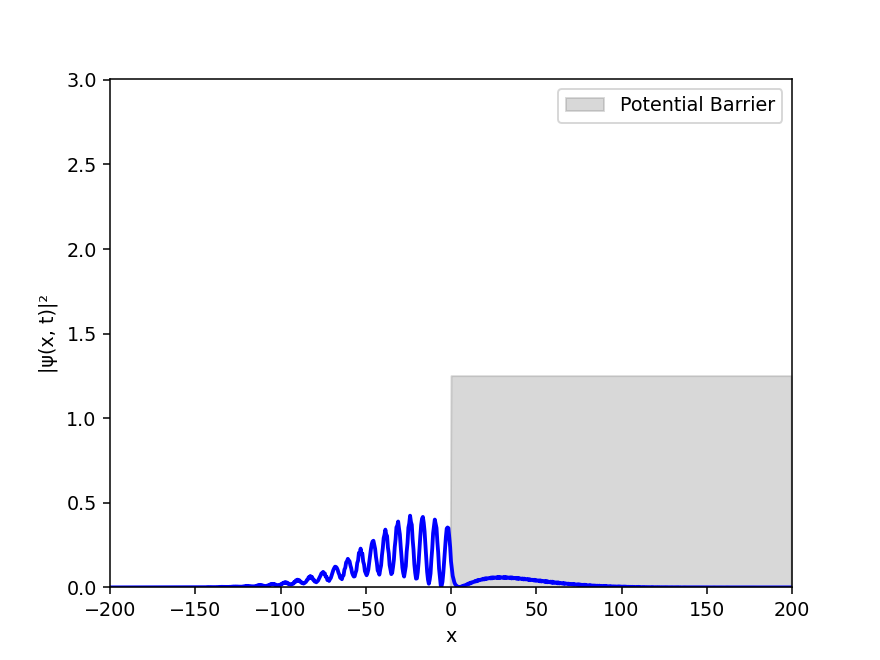

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp
%matplotlib notebook

# Initial wave packet
def initial_wave_packet(x):
    return np.exp(-((x + 0.7 * a) ** 2) / (2 * b ** 2)) * np.exp(1j * x / 2)

# Schrödinger equation in finite-difference form
def schrodinger_eq(t, y):
    psi_real = y[:n_points]  # Extract real part
    psi_imag = y[n_points:]  # Extract imaginary part
    psi = psi_real + 1j * psi_imag  # Reconstruct complex wave function

    d2_psi_dx2 = np.zeros(n_points, dtype=np.complex128)

    # Second derivative using finite differences (excluding boundaries)
    d2_psi_dx2[1:-1] = (psi[:-2] - 2 * psi[1:-1] + psi[2:]) / dx**2

    # Time derivative (i ∂ψ/∂t = -1/2 d²ψ/dx² + Vψ)
    d_psi_dt = (-0.5 * d2_psi_dx2 + V * psi) * (1j)

    # Split real and imaginary parts and return as a flat array
    return np.concatenate((d_psi_dt.real, d_psi_dt.imag)).ravel()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x_points, np.abs(psi_t[:, i]) ** 2)
    return line,

# Constants
a = 200
b = 10
x_min, x_max = -a, a
t_max = 4000
dx = 0.5
dt = 0.005
x_points = np.arange(x_min, x_max, dx)
n_points = len(x_points)

# Potential function (Step Barrier at x >= 0)
V = np.where(x_points >= 0, 0.15, 0)

psi_0 = initial_wave_packet(x_points)

# Convert complex wave function to real-valued representation for solve_ivp
y0 = np.concatenate((psi_0.real, psi_0.imag))

# Solve the equation
sol = solve_ivp(
    schrodinger_eq,
    t_span=[0, t_max],
    y0=y0,  # Use the concatenated real and imaginary parts
    t_eval=np.linspace(0, 750, 500),  # Adjust number of time steps
    method="RK45"
)

# Convert solution back to complex representation
psi_t = sol.y[:n_points, :] + 1j * sol.y[n_points:, :]

# Create animation
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, np.max(np.abs(psi_t)**2) * 1.2)  # Adjust range dynamically
ax.set_xlabel("x")
ax.set_ylabel("|ψ(x, t)|²")

# Plot potential barrier as a shaded region
barrier_height = np.max(np.abs(psi_t)**2) * 0.5  # Scale barrier for visibility
ax.fill_between(x_points, 0, V * barrier_height / 0.15, color="gray", alpha=0.3, label="Potential Barrier")

# Initialize wave function plot
line, = ax.plot([], [], lw=2, color='b')

#
ani = animation.FuncAnimation(fig, animate, frames=len(sol.t), init_func=init, interval=20, blit=True)

# Show animation
plt.legend()
plt.show()

# Save the resulting animation as a GIF file
ani.save("wave_packet2.gif", writer="pillow", fps=60)  # Save animation with 60 frames per second